In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [10]:
columns = inspector.get_columns("measurement")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns("station")
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [ ]:
# reflect an existing database into a new model

# reflect the tables

In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [13]:
# Create our session (link) from Python to the DB
query = """
        Select 
            *
        from
            station
        limit 50
        """
conn = engine.connect()
df = pd.read_sql(query, con=conn)
conn.close()

In [14]:
df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

lastYearMeaQ = """
SELECT
    date,
    prcp
FROM
    measurement
WHERE
    date >= (
                SELECT
                   date(MAX(date), '-365 day')
                FROM
                    measurement
            )
ORDER BY
    date
"""
lastYearMeaQ

"\nSELECT\n    date,\n    prcp\nFROM\n    measurement\nWHERE\n    date >= (\n                SELECT\n                   date(MAX(date), '-365 day')\n                FROM\n                    measurement\n            )\nORDER BY\n    date\n"

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column

conn = engine.connect()
df = pd.read_sql(lastYearMeaQ, con=conn)
conn.close()

In [32]:
# Sort the dataframe by date
df["date"] = pd.to_datetime(df["date"])
df.tail()

,date,prcp
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08
2229,2017-08-23,0.45


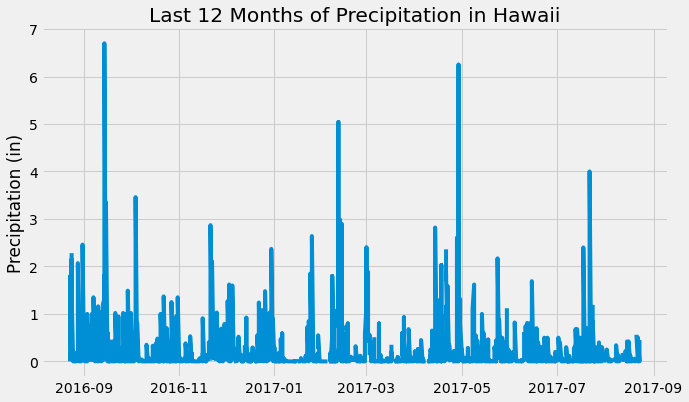

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(10,6))
plt.plot(df.date, df.prcp)
plt.title("Last 12 Months of Precipitation in Hawaii")
plt.ylabel("Precipitation (in)")

plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [48]:
# Design a query to show how many stations are available in this dataset?
 
totalStations = """
                 SELECT
                     count(*) as stationCount
                 FROM
                     station
                     """ 

In [50]:
conn2 = engine.connect()
df2 = pd.read_sql(totalStations, con=conn2)
conn2.close()
df2.head()

,stationCount
0,9


In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

activeStations = """
        SELECT
            s.station,
            count(*) as totObs
        FROM
            station s
        JOIN measurement m on s.station = m.station
        GROUP BY s.station
        ORDER BY
            count(*) desc
        """

In [67]:
conn3 = engine.connect()
df3 = pd.read_sql(activeStations, con=conn3)
conn3.close()

df3

,station,tot_obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [101]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

activeStationsVal = """
        SELECT
            s.station,
            min(tobs) as MinTemp,
            max(tobs) as MaxTemp,
            avg(tobs) as AvgTemp
        FROM
            station s
        JOIN measurement m on s.station = m.station
        WHERE s.station='USC00519281'
        """

In [102]:
connVal = engine.connect()
dfVal = pd.read_sql(activeStationsVal, con=connVal)
conn3.close()

dfVal

,station,MinTemp,MaxTemp,AvgTemp
0,USC00519281,54.0,85.0,71.663781


In [103]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mostActiveVal = """
        SELECT
            m.date,
            m.prcp,
            m.tobs,
            s.station,
            s.name
        FROM
            measurement m
            join station s on m.station = s.station
        WHERE
            date >= (
                        SELECT
                           date(MAX(date), '-365 day')
                        FROM
                            measurement
                    )
        ORDER BY
            date
        """

In [104]:
conn4 = engine.connect()
df4 = pd.read_sql(mostActiveVal, con=conn4)
conn4.close()

df4

,date,prcp,tobs,station,name
0,2016-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
1,2016-08-23,0.15,76.0,USC00513117,"KANEOHE 838.1, HI US"
2,2016-08-23,0.05,80.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,2016-08-23,NaN,80.0,USC00517948,"PEARL CITY, HI US"
4,2016-08-23,0.02,80.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
...,...,...,...,...,...
2225,2017-08-22,0.50,76.0,USC00516128,"MANOA LYON ARBO 785.2, HI US"
2226,2017-08-23,0.00,81.0,USC00519397,"WAIKIKI 717.2, HI US"
2227,2017-08-23,0.00,82.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
2228,2017-08-23,0.08,82.0,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"


In [105]:
df4.groupby("station").size().sort_values(ascending=False)

station
USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
dtype: int64

In [106]:
#most active station
mostActive = df4.groupby("station").size().sort_values(ascending=False).index[0]
mostActive

'USC00519397'

In [107]:
dfSub = df4.loc[df4.station == mostActive].reset_index(drop=True) 

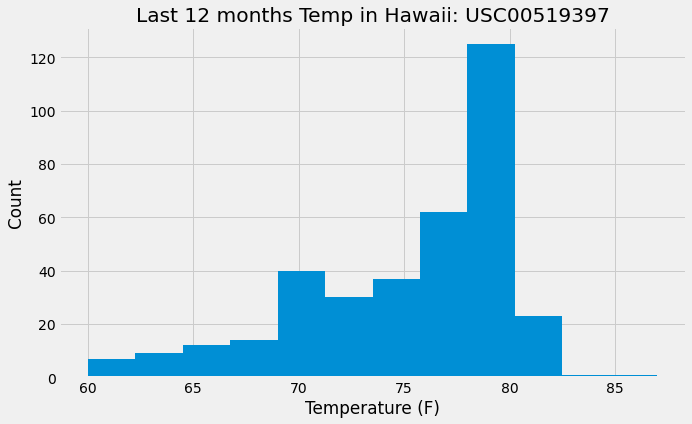

In [108]:
plt.figure(figsize=(10,6))
plt.hist(dfSub.tobs, bins=12)
plt.title(f"Last 12 months Temp in Hawaii: {mostActive}")
plt.ylabel("Count")
plt.xlabel("Temperature (F)")

plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
